In [181]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [182]:

df_init = pd.read_csv('Amazon Fine Food Reviews.csv') #Датасет для анализа отзывов
df_init.drop_duplicates()
df_rules = df_init.head(8000)
df_manual = pd.read_csv('Amazon Fine Food Reviews Manual.csv') #df_init.tail(2000)

In [183]:
df_rules.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [184]:
df_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      8000 non-null   int64 
 1   ProductId               8000 non-null   object
 2   UserId                  8000 non-null   object
 3   ProfileName             8000 non-null   object
 4   HelpfulnessNumerator    8000 non-null   int64 
 5   HelpfulnessDenominator  8000 non-null   int64 
 6   Score                   8000 non-null   int64 
 7   Time                    8000 non-null   int64 
 8   Summary                 8000 non-null   object
 9   Text                    8000 non-null   object
dtypes: int64(5), object(5)
memory usage: 625.1+ KB


In [185]:
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      2000 non-null   int64 
 1   ProductId               2000 non-null   object
 2   UserId                  2000 non-null   object
 3   ProfileName             2000 non-null   object
 4   HelpfulnessNumerator    2000 non-null   int64 
 5   HelpfulnessDenominator  2000 non-null   int64 
 6   Score                   2000 non-null   int64 
 7   Time                    2000 non-null   int64 
 8   Summary                 2000 non-null   object
 9   Text                    2000 non-null   object
 10  sentiment               2000 non-null   object
dtypes: int64(5), object(6)
memory usage: 172.0+ KB


In [186]:
from textblob import TextBlob

In [187]:
def get_sentiment(text): # Определение функции для получения полярности настроения твита
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_sentiment_label(score): # Определение функции для присвоения метки настроения на основе оценки полярности настроения
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [188]:
df_rules['sentiment'] = df_rules['Text'].apply(get_sentiment)
df_rules['sentiment'] = df_rules['sentiment'].apply(get_sentiment_label)
df_rules.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


<Axes: >

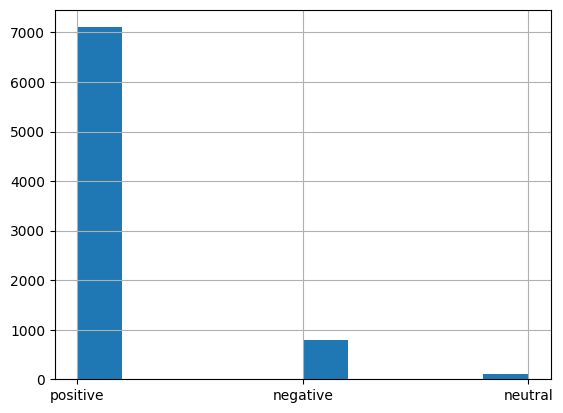

In [189]:
df_rules['sentiment'].hist()

<Axes: >

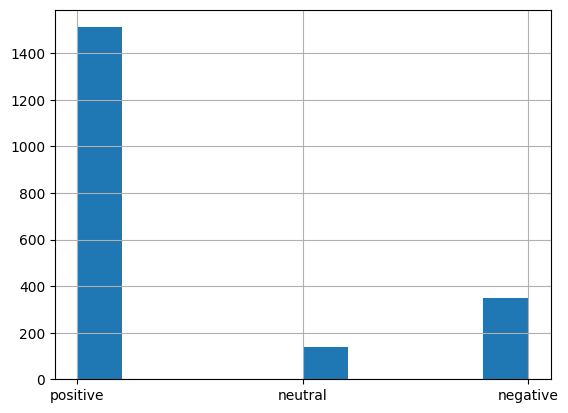

In [190]:
df_manual['sentiment'].hist()

In [191]:
# Обьединение размеченных данных
df_labeled = pd.concat([df_rules, df_manual])

In [192]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
 10  sentiment               10000 non-null  object
dtypes: int64(5), object(6)
memory usage: 937.5+ KB


In [193]:
df_labeled.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,positive
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,positive
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,positive
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,positive


In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

<Axes: >

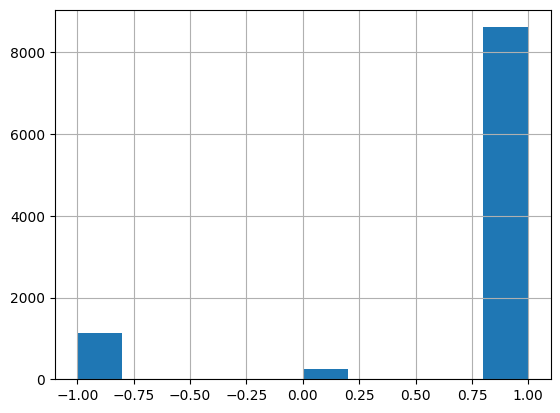

In [195]:
# Замена 'negative' на -1, 'neutral' на 0 и 'positive' на 1
df_labeled['sentiment'] = df_labeled['sentiment'].replace({'negative': -1, 'neutral': 0, 'positive': 1})
df_labeled['sentiment'].hist()

In [196]:
# Перемешивание данных
df_labeled = shuffle(df_labeled)

In [197]:
# Разделение данных на тренировочные и тестовые
df_labeled_train = df_labeled[:9000]
df_labeled_test = df_labeled[9000:]

In [198]:
df_labeled_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 3079 to 7626
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      9000 non-null   int64 
 1   ProductId               9000 non-null   object
 2   UserId                  9000 non-null   object
 3   ProfileName             9000 non-null   object
 4   HelpfulnessNumerator    9000 non-null   int64 
 5   HelpfulnessDenominator  9000 non-null   int64 
 6   Score                   9000 non-null   int64 
 7   Time                    9000 non-null   int64 
 8   Summary                 9000 non-null   object
 9   Text                    9000 non-null   object
 10  sentiment               9000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 843.8+ KB


In [199]:
df_labeled_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2103 to 464
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
 10  sentiment               1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 93.8+ KB


In [200]:
# Разделение тренировочного датасета на размеченную и неразмеченную выборки
labeled_reviews, unlabeled_reviews = train_test_split(df_labeled_train, train_size=0.6, random_state=55)

In [201]:
labeled_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
5466,5467,B00622CYVI,A2E8MHOQ7580TM,Jayashree,0,0,5,1330473600,Yummy flavors!,Our baby LOVES LOVES this food. We actually mi...,1
842,843,B000UWSQT0,A1LWILWU3AAFPG,"Christine Giles ""shazzypupp""",0,0,3,1262304000,not creamy...,"To my mind, a fine caramel should be creamy an...",1
505,566960,B000YHLS8W,A1BG02VB5E9BFC,sscheeps,1,1,4,1335830400,Delicious!,Great taste and very moist. Plenty of chocola...,1
3528,3529,B005TY2REE,AY12DBB0U420B,Gary Peterson,0,0,4,1333756800,No cholesterol. No Sodium. Not Very Sweet. Goo...,In my trip through the health area of my local...,1
1964,568419,B001F2GDJY,AFFKPAAZCQ5IK,biscuit,3,3,5,1322438400,tuffer,we just had a new lawn put in and it was very ...,1


In [202]:
unlabeled_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
982,567437,B000H2279I,A1CYE7C789X1CJ,"FloatingMoonStudio ""Elaine""",2,2,5,1206057600,Simply the Best!,"I LOVE Tilda rice! I am not a native of India,...",1
6945,6946,B001LG945O,A16YU3GRGCD95S,"Theresa M. Studer ""Terra57""",0,0,4,1247443200,Really Not Too Bad,I usually drink my soda room temperature but w...,1
7976,7977,B004WM0ZTS,A6VU4RNEQJ7EQ,BobK,0,0,4,1275436800,pricey but good,I bought this as an experiment to try on a cam...,1
2649,2650,B0016FY6H6,A2G4IIUA18TVCP,"Sifu ""Sifu""",0,0,3,1311292800,Makes great drinks but you have to use a lot!,This tea has an awfully light flavor. I use th...,-1
3684,3685,B000ER1DIM,A2RERXI7RH3CIA,Rebecca P. Baron,3,3,5,1249344000,A favorite,We have to hide these boxes and pull them out ...,0


In [203]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_reviews):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews['Text'])
    y = labeled_reviews['sentiment']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [204]:
# Обучение начальной модели на небольшом наборе
model, vectorizer = train_model(labeled_reviews)

In [205]:
# Использование обученной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_reviews['Text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [206]:
# Вычисление неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [207]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [208]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [209]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_reviews)

In [210]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(df_labeled_test['Text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(df_labeled_test['sentiment'], y_test_predicted, average='micro')
a1 = accuracy_score(df_labeled_test['sentiment'], y_test_predicted)
print(f'f1_score - {f1}, accuracy_score - {a1}')

f1_score - 0.891, accuracy_score - 0.891


# Вывод: модель хорошо обучилась, показав высокую эффективность в разметке данных. Метрики f1_score - 0.891, accuracy_score - 0.891, показали высокие значения.